**Mini-Project: Analisis Data Tidur Mamalia**

**Tujuan: Menganalisis(memahami pola tidur mamalia) dan meringkas data waktu tidur mamalia, lalu membandingkan pola tidur antara kelompok mamalia yang berbeda.**

---

**Muat dan Jelajahi Data:**

- Lihat beberapa baris pertama data (.head()) dan gunakan .info() untuk memahami tipe data setiap kolom.

In [43]:
import pandas as pd 
import numpy as np

# load_csv_file
msleep = pd.read_csv('msleep.csv')

# displya head()
print(msleep.head())
print('=' * 50)
print(msleep.info())

              name     vore  sleep_total
0          Cheetah    carni         12.1
1       Owl monkey     omni         17.0
2  Mountain beaver    herbi         14.4
3              Cow    herbi          4.0
4    Big brown bat  insecti         19.7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         22 non-null     object 
 1   vore         22 non-null     object 
 2   sleep_total  22 non-null     float64
dtypes: float64(1), object(2)
memory usage: 660.0+ bytes
None


---

**2. Analisis Deskriptif Keseluruhan:**

- Fokus pada kolom sleep_total (total jam tidur).
- Hitung ukuran pemusatan: mean, median.
- Hitung ukuran penyebaran: simpangan baku (standard deviation), varian (variance), dan IQR.
- Gunakan metode .describe() pada kolom sleep_total untuk mendapatkan ringkasan cepat dari semua statistik ini.

In [44]:
# measure of centre (mean, median)
mean, median = np.mean(msleep['sleep_total']), np.median(msleep['sleep_total'])

print("Rata - rata total tidur adalah:", round(mean, 2))
print("Dengan Total Median/nilai tengah:", round(median, 2))

print('=' * 50)

#measure of variance -> "We use ddof=1 because the dataset we're using represents a sample, not the entire population."
variance = np.var(msleep['sleep_total'], ddof=1).round(2)
print("Dimana Variancenya Sebesar:", variance)

#measure standard Deviation
std_dev = np.std(msleep['sleep_total'], ddof=1).round(2)
print("Dengan Standard Deviation sebesar:", std_dev)

print('=' * 50)

# measure IQR
Q1 = np.percentile(msleep['sleep_total'], 25)
Q3 = np.percentile(msleep['sleep_total'], 75)
IQR = Q3 - Q1
print(f"Perhitungan IQR menunjukan angka sebesar: {round(IQR, 2)}")

print('=' * 50)

# for fast
summary = msleep['sleep_total'].describe().round()
print("Summary Statistic\n", summary)


Rata - rata total tidur adalah: 11.25
Dengan Total Median/nilai tengah: 11.4
Dimana Variancenya Sebesar: 25.68
Dengan Standard Deviation sebesar: 5.07
Perhitungan IQR menunjukan angka sebesar: 5.6
Summary Statistic
 count    22.0
mean     11.0
std       5.0
min       3.0
25%       9.0
50%      11.0
75%      14.0
max      20.0
Name: sleep_total, dtype: float64


---
**3. Visualisasi Distribusi:**
- Buat histogram untuk kolom sleep_total untuk melihat distribusi waktu tidur. Apakah distribusinya simetris, miring ke kiri, atau miring ke kanan?
- Buat boxplot untuk kolom sleep_total untuk melihat kuartil dan mengidentifikasi potensi outlier.

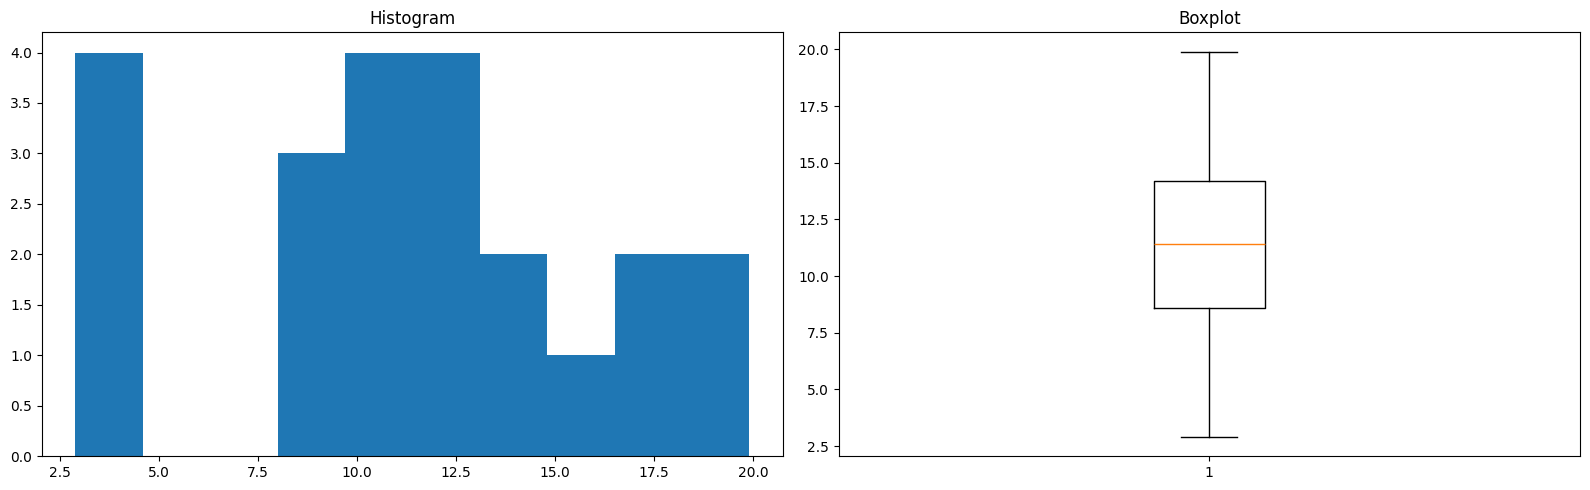

In [45]:
import matplotlib.pyplot as plt  

fig, axs = plt.subplots(1, 2, figsize=(16, 5))
# histogram
axs[0].hist(msleep['sleep_total'])   
axs[0].set_title('Histogram')

# boxplot
axs[1].boxplot(msleep['sleep_total']) 
axs[1].set_title('Boxplot') 


plt.tight_layout()
plt.show()

In [46]:
Q1 = msleep['sleep_total'].quantile(0.25)
Q3 = msleep['sleep_total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = msleep[(msleep['sleep_total'] < lower_bound) | (msleep['sleep_total'] > upper_bound)]

print("Outliers:")
print(outliers['sleep_total'])


Outliers:
Series([], Name: sleep_total, dtype: float64)


*** histogram cenderung right skew dan tidak terlihat posisi outlier ***

---

**4. Analisis Perbandingan:**

- Kelompokkan data berdasarkan jenis makanan mamalia (kolom vore).
- Hitung mean dan median dari sleep_total untuk setiap kelompok (carni, herbi, omni, insecti).
- Sajikan hasil perbandingan ini. Kelompok mamalia manakah yang cenderung tidur paling lama? Kelompok mana yang tidurnya paling singkat?

hasil Perhitungan Analisis Perbandingan

           mean  median
vore                  
carni    12.09    12.1
herbi     6.96     4.0
insecti  19.23    19.7
omni     11.32     9.7


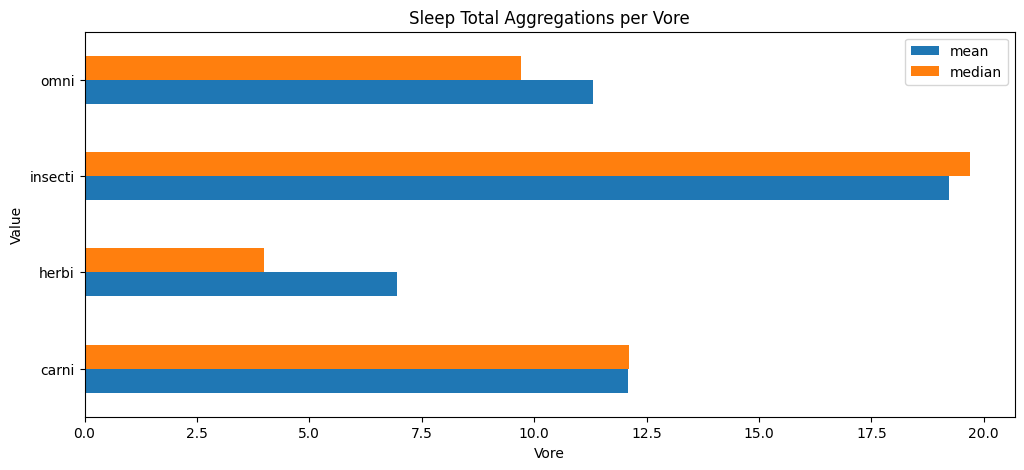

In [72]:
analisis_Perbandingan = msleep.groupby('vore')['sleep_total'].agg(['mean', 'median']).round(2)
print("hasil Perhitungan Analisis Perbandingan\n\n", analisis_Perbandingan)


analisis_Perbandingan.plot(kind='barh', figsize=(12, 5))
plt.title("Sleep Total Aggregations per Vore")
plt.ylabel("Value")
plt.xlabel("Vore")
plt.show()


In [73]:
# print(msleep['vore'].value_counts())

# Group by 'vore' dan hitung data di setiap kolom
frekuensi_vore_count = msleep.groupby('vore').count()

print(frekuensi_vore_count)

         name  sleep_total
vore                      
carni       7            7
herbi       7            7
insecti     3            3
omni        5            5


---
**Kesimpulan Singkat:**

"Rata-rata waktu tidur mamalia dalam dataset ini adalah 11.25 jam. Ditemukan bahwa kelompok [insect] memiliki rata-rata tidur terlama, sedangkan kelompok [herbivora] memiliki rata-rata terpendek tetapi secara total keseluruhan [karnivora] memiliki waktu tidur terlama. Distribusi waktu tidur secara keseluruhan menunjukkan sedikit kemiringan ke arah [kanan]."